In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

from functions import rand_state, prep_training, opt, check, eH, get_random_unitary, cost
from hamiltonians import get_random_H, get_random_tensor_H, get_interpolated_H, get_central_spin_H, get_decoherence_time, pauli_decomp
from datatypes import SubSysResult

In [2]:
qS = 1 # number of system qubits
qE = 2 # number of envt qubits

n_qubits = qS + qE

Set up the conditions

In [3]:
seed = 42
int_term_factor = 1.

## get Hamiltonian
# get_H_function = partial(get_random_tensor_H, qS=qS, qE=qE, seed=seed)
# get_H_function = partial(get_random_H, n_qubits=qS+qE)
get_H_function = partial(get_central_spin_H, qS=qS, qE=qE, randomized=False, int_term_factor=int_term_factor)

## prepare everything needed for the optimization 
B, H, psi_object = prep_training(get_H_function, qS, qE, random_state=True, A_acts_globally=False, A_is_identity=True, seed=seed)

## decoherence time should always be 1
t_dec = get_decoherence_time(H)

## define training times
dt_training = np.logspace(np.log10(t_dec)-2,np.log10(t_dec)+3, 15)

## print Pauli deocmposition of H
pauli_decomp(H,printt=True);

('I', 'I', 'Y') 0.33333333333333337
('I', 'Y', 'I') 0.33333333333333337
('Y', 'I', 'I') 0.33333333333333337


In [4]:
# initial cost
cost(psi_object, B, H, dt_training, qS, qE)

DeviceArray(0.3556325, dtype=float64)

Train!

In [5]:
## the first optimization with a new option takes time to compile.
B, co = opt(B, dt_training, psi_object, H, qS, qE, thresh=1e-13, maxiter=1e4, train_state=True)

Starting Guess purity 0.3556324990483203
COST 0.3258635091627815 after 1 iterations  alpha= 13.636363636363635 beta= 13.636363636363635
COST 0.29024396158830834 after 2 iterations  alpha= 12.39669421487603 beta= 12.39669421487603
COST 0.2514677601031082 after 3 iterations  alpha= 11.269722013523662 beta= 11.269722013523662
COST 0.21410827486092487 after 4 iterations  alpha= 10.245201830476056 beta= 10.245201830476056
COST 0.18256627133611322 after 5 iterations  alpha= 9.313819845887323 beta= 9.313819845887323
COST 0.15874189632674807 after 6 iterations  alpha= 8.467108950806656 beta= 8.467108950806656
COST 0.1417043825252443 after 7 iterations  alpha= 7.6973717734605955 beta= 7.6973717734605955
COST 0.1291892878519754 after 8 iterations  alpha= 6.9976107031459955 beta= 6.9976107031459955
COST 0.11907908895076769 after 9 iterations  alpha= 6.361464275587268 beta= 6.361464275587268
COST 0.10999188088046703 after 10 iterations  alpha= 5.783149341442971 beta= 5.783149341442971
COST 1.74862

Plot the generalization behavior

Maximal test impurity: 2.704716761670056e-07


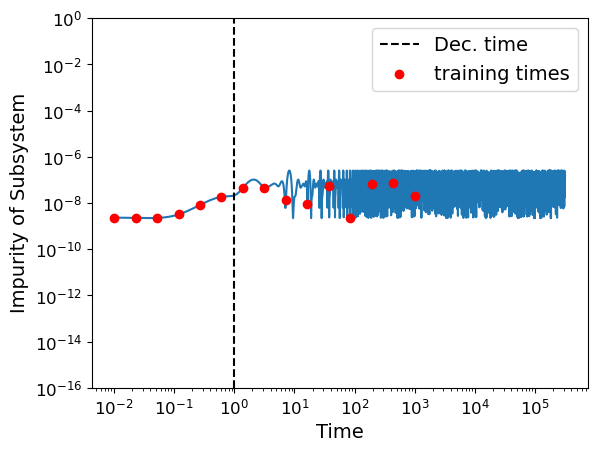

In [6]:
times = np.logspace(np.log10(t_dec)-2, 5.5, 10000)
test_impurities = np.array(check(psi_object, B, H, times, qS, qE))

plt.plot(times, test_impurities)
plt.vlines(get_decoherence_time(H), 1e-16, 1, color="black", label="Dec. time", linestyle="dashed")
print("Maximal test impurity:", np.max(test_impurities))
plt.scatter(dt_training, np.array(check(psi_object, B, H, dt_training, qS, qE)), color="red", label="training times", zorder=3)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Impurity of Subsystem", fontsize=14)
plt.gca().tick_params(labelsize=12)
plt.legend(fontsize=14)

plt.ylim(1e-16, 1.e-0)
plt.xscale("log")
plt.yscale("log")

plt.show()